# Load and View Data

Number of data points: 200
k in [0, 199]


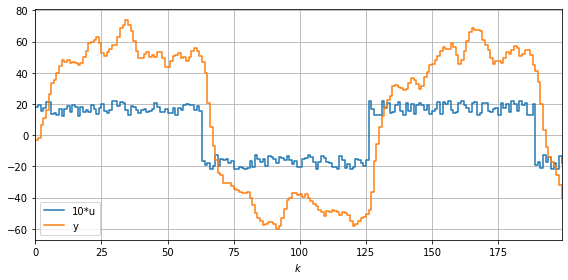

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = '../data.csv'
data = pd.read_csv(file, header=None, names=['u', 'y'])
N = len(data)

k = data.index.values
u = data.u.values
y = data.y.values

print('Number of data points:', N)
print(f'k in [{k[0]}, {k[-1]}]')

plt.figure(figsize=(8,4))
plt.plot(k, 10*u, label='10*u', drawstyle='steps-post')
plt.plot(k, y   , label='y'   , drawstyle='steps-post')
plt.xlim(k[0], k[-1])
plt.xlabel(r'$k$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## Input Fourier Transform

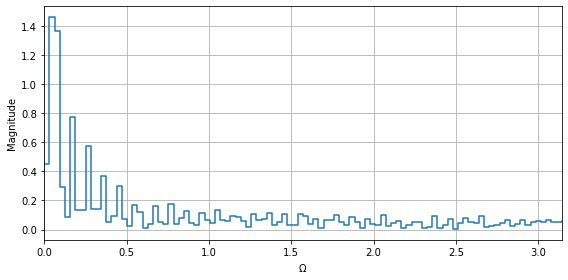

In [71]:
from scipy import fft

u_rfft = fft.rfft(u, norm='forward')
u_rfft[1:-1] = 2*u_rfft[1:-1]

u_rfft_mag = np.abs(u_rfft)
Omega = np.linspace(0, np.pi, len(u_rfft_mag))

plt.figure(figsize=(8,4))
plt.plot(Omega, u_rfft_mag, drawstyle='steps-post')
plt.xlim(Omega[0], Omega[-1])
plt.xlabel(r'$\Omega$')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()

## Separate Identification and Validation Data

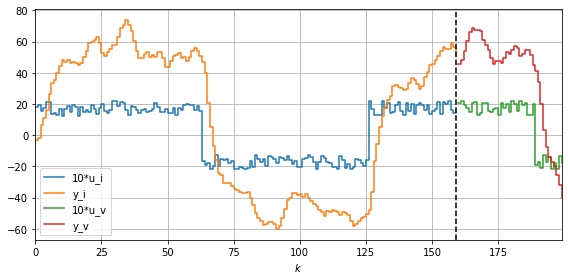

In [72]:
N_fold = 160

k_i = k[:N_fold]
u_i = u[:N_fold]
y_i = y[:N_fold]

k_v = k[N_fold:]
u_v = u[N_fold:]
y_v = y[N_fold:]

plt.figure(figsize=(8,4))
plt.plot(k_i, 10*u_i, label='10*u_i', drawstyle='steps-post')
plt.plot(k_i, y_i   , label='y_i'   , drawstyle='steps-post')
plt.plot(k_v, 10*u_v, label='10*u_v', drawstyle='steps-post')
plt.plot(k_v, y_v   , label='y_v'   , drawstyle='steps-post')
plt.axvline(k[N_fold-1], color='black', linestyle='--')
plt.xlim(k[0], k[-1])
plt.xlabel(r'$k$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Generic Model

\begin{gather*}
A(q) \, y[k] = \dfrac{B(q)}{F(q)} \, u[k - n_k + 1] + \dfrac{C(q)}{D(q)} \, e[k]
\\
y[k] = G(q) \, u[k - n_k + 1] + H(q) \, e[k]
\\
G(q) = \dfrac{B(q)}{A(q) \, F(q)}
\qquad
H(q) = \dfrac{C(q)}{A(q) \, D(q)}
\\
A(q) = 1 - a_1 \, q^{-1} - \dotsb - a_{n_a} \, q^{-n_a}
\\
B(q) = b_1 \, q^{-1} + \dotsb + b_{n_b} \, q^{-n_b} + + b_{n_b + 1} \, q^{-n_b-1}
\\
C(q) = 1 + c_1 \, q^{-1} + \dotsb + c_{n_c} \, q^{-n_c}
\\
D(q) = 1 + d_1 \, q^{-1} + \dotsb + d_{n_d} \, q^{-n_d}
\\
F(q) = 1 + f_1 \, q^{-1} + \dotsb + f_{n_f} \, q^{-n_f}
\end{gather*}

In [73]:
from functions import models_frame

models = models_frame()

# ARX

\begin{gather*}
y[k] = G(q) \, u[k - n_k + 1] + H(q) \, e[k]
\\
G(q) = \dfrac{B(q)}{A(q)}
\qquad
H(q) = \dfrac{1}{A(q)}
\\
A(q) = 1 - a_1 \, q^{-1} - \dotsb - a_{n_a} \, q^{-n_a}
\\
B(q) = b_1 \, q^{-1} + \dotsb + b_{n_b} \, q^{-n_b} + + b_{n_b + 1} \, q^{-n_b-1}
\end{gather*}

In [74]:
from functions import arx

na_range = range(0, 3 + 1)
nb_range = range(0, 2 + 1)
nk_range = range(0, 2 + 1)

models_arx = arx(u_i, y_i, u_v, y_v, na_range, nb_range, nk_range)

models = pd.concat([models, models_arx], ignore_index=True)

# ARMAX

\begin{gather*}
y[k] = G(q) \, u[k - n_k + 1] + H(q) \, e[k]
\\
G(q) = \dfrac{B(q)}{A(q)}
\qquad
H(q) = \dfrac{C(q)}{A(q)}
\\
A(q) = 1 - a_1 \, q^{-1} - \dotsb - a_{n_a} \, q^{-n_a}
\\
B(q) = b_1 \, q^{-1} + \dotsb + b_{n_b} \, q^{-n_b} + + b_{n_b + 1} \, q^{-n_b-1}
\\
C(q) = 1 + c_1 \, q^{-1} + \dotsb + c_{n_c} \, q^{-n_c}
\end{gather*}

In [75]:
from functions import armax

na_range = range(0, 3 + 1)
nb_range = range(0, 2 + 1)
nc_range = range(0, 3 + 1)
nk_range = range(0, 2 + 1)

models_armax = armax(u_i, y_i, u_v, y_v, na_range, nb_range, nc_range, nk_range)

models = pd.concat([models, models_armax], ignore_index=True)

# Output Error

\begin{gather*}
y[k] = G(q) \, u[k - n_k + 1] + H(q) \, e[k]
\\
G(q) = \dfrac{B(q)}{F(q)}
\qquad
H(q) = 1
\\
B(q) = b_1 \, q^{-1} + \dotsb + b_{n_b} \, q^{-n_b} + + b_{n_b + 1} \, q^{-n_b-1}
\\
F(q) = 1 + f_1 \, q^{-1} + \dotsb + f_{n_f} \, q^{-n_f}
\end{gather*}

In [76]:
from functions import oe

nb_range = range(0, 2 + 1)
nf_range = range(1, 3 + 1) # nf = 0 causa erro no pysid!
nk_range = range(0, 2 + 1)

models_oe = oe(u_i, y_i, u_v, y_v, nb_range, nf_range, nk_range)

models = pd.concat([models, models_oe], ignore_index=True)

# Box-Jenkins

\begin{gather*}
y[k] = G(q) \, u[k - n_k + 1] + H(q) \, e[k]
\\
G(q) = \dfrac{B(q)}{F(q)}
\qquad
H(q) = \dfrac{C(q)}{D(q)}
\\
B(q) = b_1 \, q^{-1} + \dotsb + b_{n_b} \, q^{-n_b} + + b_{n_b + 1} \, q^{-n_b-1}
\\
C(q) = 1 + c_1 \, q^{-1} + \dotsb + c_{n_c} \, q^{-n_c}
\\
D(q) = 1 + d_1 \, q^{-1} + \dotsb + d_{n_d} \, q^{-n_d}
\\
F(q) = 1 + f_1 \, q^{-1} + \dotsb + f_{n_f} \, q^{-n_f}
\end{gather*}

In [ ]:
from functions import bj

nb_range = range(0, 2 + 1)
nc_range = range(0, 3 + 1)
nd_range = range(0, 3 + 1)
nf_range = range(0, 3 + 1)
nk_range = range(0, 2 + 1)

models_bj = bj(u_i, y_i, u_v, y_v, nb_range, nc_range, nd_range, nf_range, nk_range)

models = pd.concat([models, models_bj], ignore_index=True)

# Results

In [78]:
print('Number of models:', len(models.loc[models.B.notnull()]))
print('Number of fails: ', len(models.loc[models.B.isnull()]))

Number of models: 557
Number of fails:  226


## Sort by Prediction Cost

In [79]:
models.sort_values(by=['Jp'], inplace=True)

## Display Predictions

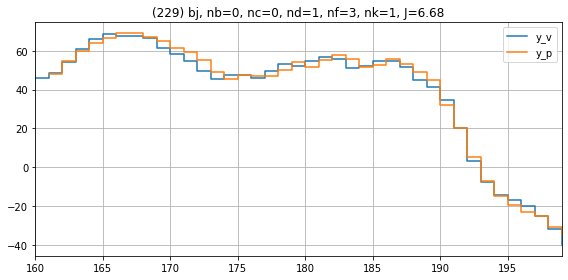

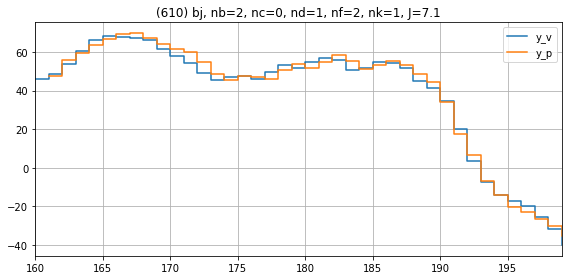

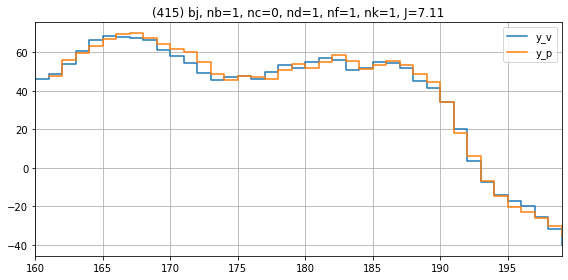

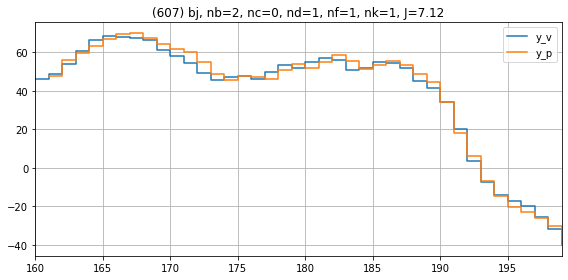

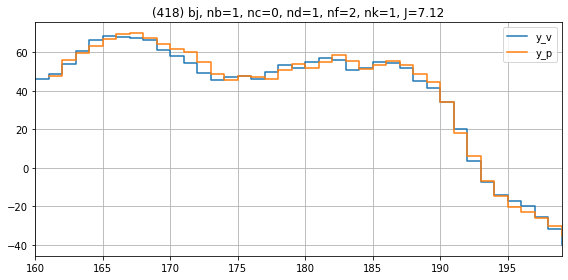

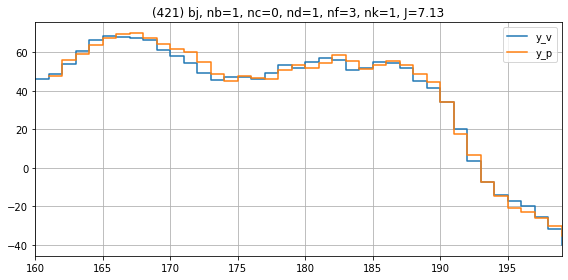

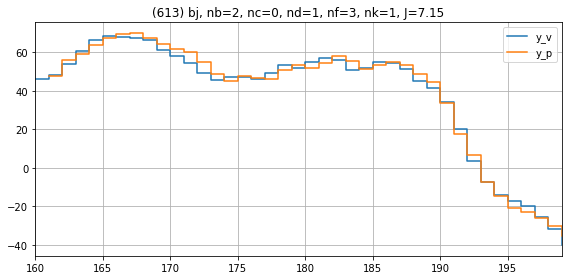

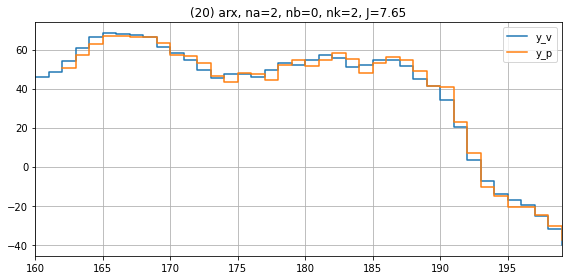

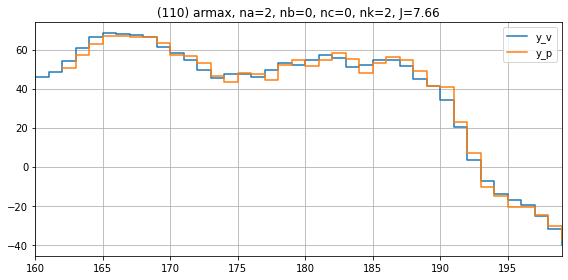

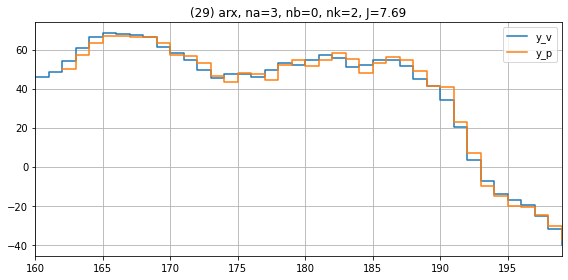

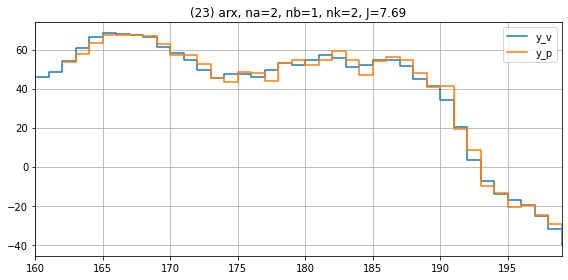

In [80]:

for i, (index, model) in enumerate(models.iterrows()):
  if i > 10:
    break

  if np.isnan(model.yp).any():
    continue

  if model.model == 'arx':
    title = f'({index}) {model.model}, na={model.na}, nb={model.nb}, nk={model.nk}, J={model.Jp:.3g}'
  elif model.model == 'armax':
    title = f'({index}) {model.model}, na={model.na}, nb={model.nb}, nc={model.nc}, nk={model.nk}, J={model.Jp:.3g}'
  elif model.model == 'oe':
    title = f'({index}) {model.model}, nb={model.nb}, nf={model.nf}, nk={model.nk}, J={model.Jp:.3g}'
  elif model.model == 'bj':
    title = f'({index}) {model.model}, nb={model.nb}, nc={model.nc}, nd={model.nd}, nf={model.nf}, nk={model.nk}, J={model.Jp:.3g}'
  else:
    assert(False)

  # display(model.G)

  plt.figure(figsize=(8,4))
  plt.title(title)
  plt.plot(k_v, y_v, label='y_v', drawstyle='steps-post')
  plt.plot(k_v[model.nk:], model.yp, label='y_p', drawstyle='steps-post')
  plt.xlim(k_v[0], k_v[-1])
  plt.grid()
  plt.legend()
  plt.tight_layout()
  plt.show()

## Display Best ARX

In [81]:
display(models.loc[models.model == 'arx'][['na','nb','nk','Jp','A','B',]].head(20))

,na,nb,nk,Jp,A,B
20,2,0,2,7.645443,"[1.0, -1.3660455345977758, 0.46216420283874365]","[0.0, 0.0, 2.6625996144096495]"
29,3,0,2,7.689685,"[1.0, -1.3873295518220405, 0.48805419928292326...","[0.0, 0.0, 2.5495944772087906]"
23,2,1,2,7.689954,"[1.0, -1.4641248135410299, 0.5285400201585324]","[0.0, 0.0, 3.2667955231622616, -1.512659611800..."
32,3,1,2,7.892806,"[1.0, -1.4338646895641036, 0.4480849301598035,...","[0.0, 0.0, 3.2988193484523514, -1.597544061149..."
35,3,2,2,8.105173,"[1.0, -1.4646304544414424, 0.528125287033142, ...","[0.0, 0.0, 3.2526649889541677, -1.770506126503..."
26,2,2,2,8.116282,"[1.0, -1.470109560817867, 0.5424885365137805]","[0.0, 0.0, 3.24561533692063, -1.76727531046355..."
13,1,1,1,9.445924,"[1.0, -0.8393277799197246]","[0.0, 2.5182279776811285, 2.247524574924342]"
16,1,2,1,9.446921,"[1.0, -0.8475073498920537]","[0.0, 2.565934481739721, 2.624492279202261, -0..."
17,1,2,2,12.220939,"[1.0, -0.8536344010412926]","[0.0, 0.0, 4.779090659243092, -0.2522758132522..."
10,1,0,1,12.227166,"[1.0, -0.8678590885029938]","[0.0, 3.9772885834983422]"


## Display Best ARMAX

In [82]:
display(models.loc[models.model == 'armax'][['na','nb','nc','nk','Jp','A','B','C']].head(20))

,na,nb,nc,nk,Jp,A,B,C
110,2,0,0,2,7.655574,"[1.0, -1.362122379521981, 0.4587552445700221]","[0.0, 0.0, 2.67814901214612]",[1.0]
146,3,0,0,2,7.746983,"[1.0, -1.372107576696417, 0.48234394954692567,...","[0.0, 0.0, 2.6789063216335074]",[1.0]
125,2,1,1,2,7.758462,"[1.0, -1.4600096157027267, 0.5255264002325278]","[0.0, 0.0, 3.375042699009375, -1.5856254449940...","[1.0, -0.011089805787230764]"
122,2,1,0,2,7.768006,"[1.0, -1.4527206948581295, 0.5192633529898458]","[0.0, 0.0, 3.373178325899714, -1.553870209586459]",[1.0]
158,3,1,0,2,7.981943,"[1.0, -1.4226945047469746, 0.43970782319280444...","[0.0, 0.0, 3.409553051450076, -1.6411466235616...",[1.0]
170,3,2,0,2,8.308704,"[1.0, -1.4503767229272535, 0.5066968102866604,...","[0.0, 0.0, 3.339266589052116, -1.8938528860596...",[1.0]
137,2,2,1,2,8.311072,"[1.0, -1.475717281818618, 0.5469116297457893]","[0.0, 0.0, 3.3336402291030303, -1.967736751034...","[1.0, -0.02244962850440833]"
134,2,2,0,2,8.321067,"[1.0, -1.4609863882165854, 0.5343165080233506]","[0.0, 0.0, 3.323574570886201, -1.8887521811331...",[1.0]
149,3,0,1,2,8.342984,"[1.0, -0.9399801899614851, -0.208706173994137,...","[0.0, 0.0, 3.249889847820225]","[1.0, 0.4596703082418364]"
161,3,1,1,2,8.469429,"[1.0, -1.1844387652049873, 0.09576639519608975...","[0.0, 0.0, 3.385492016217483, -1.0482476919565...","[1.0, 0.24506116219632135]"


## Display Best OE

In [83]:
display(models.loc[models.model == 'oe'][['nb','nf','nk','Jp','B','F',]].head(20))

,nb,nf,nk,Jp,B,F
206,2,3,2,226.888138,"[0.0, 0.0, 7.978013556932356, -3.2286730261476...","[1.0, -0.9518156100627038, -0.3203644473814848..."
197,1,3,2,226.967451,"[0.0, 0.0, 7.838397199009468, -6.694009875361453]","[1.0, -1.4544706372946097, 0.4468435158751912,..."
203,2,2,2,227.08397,"[0.0, 0.0, 7.711764588803071, -6.9074618014256...","[1.0, -1.5244322818192362, 0.56005967515822]"
194,1,2,2,227.262327,"[0.0, 0.0, 7.563069203358311, -6.423786171942781]","[1.0, -1.509661698574922, 0.5468800443643043]"
200,2,1,2,241.402568,"[0.0, 0.0, 8.08301108469978, -1.78417565469243...","[1.0, -0.8709600909127035]"
202,2,2,1,249.64325,"[0.0, 3.5064182856277886, -0.07824020826054166...","[1.0, -1.6007510106966596, 0.627251005434897]"
191,1,1,2,250.846734,"[0.0, 0.0, 9.157994362787939, -4.8911579830779...","[1.0, -0.8573586792852766]"
196,1,3,1,252.373055,"[0.0, 3.3507417420103387, -2.7664680983782803]","[1.0, -2.1777873976684754, 1.625637672754031, ..."
205,2,3,1,256.792102,"[0.0, 4.628640282915869, -8.623214903962165, 4...","[1.0, -2.759095117485883, 2.61038161396743, -0..."
188,0,3,2,261.168841,"[0.0, 0.0, 7.921348852710581]","[1.0, -0.4573530409988488, -0.0409717896603812..."


## Display Best BJ

In [84]:
display(models.loc[models.model == 'bj'][['nb','nc','nd','nf','nk','Jp','B','C','D','F']].head(20))

,nb,nc,nd,nf,nk,Jp,B,C,D,F
229,0,0,1,3,1,6.675921,"[0.0, 2.688141278221442]",[1.0],"[1.0, -0.9289937416737682]","[1.0, -1.5632174239302818, 0.8951586489158623,..."
610,2,0,1,2,1,7.103042,"[0.0, 2.3478282185298474, 5.096527272299687, 2...",[1.0],"[1.0, -0.9341682155923209]","[1.0, 0.1442903549544611, -0.7839292708223434]"
415,1,0,1,1,1,7.107374,"[0.0, 2.344296218297878, 2.825520409261619]",[1.0],"[1.0, -0.9343867522324996]","[1.0, -0.8153741783712067]"
607,2,0,1,1,1,7.119668,"[0.0, 2.344447984057369, 2.8318259756191324, -...",[1.0],"[1.0, -0.9342305307417798]","[1.0, -0.8159164961511574]"
418,1,0,1,2,1,7.122786,"[0.0, 2.34448302850676, 2.852622937222137]",[1.0],"[1.0, -0.934195041218468]","[1.0, -0.8078458673576828, -0.0066902219605544..."
421,1,0,1,3,1,7.126711,"[0.0, 2.3310033884478294, 3.0402361290651934]",[1.0],"[1.0, -0.9369178960361715]","[1.0, -0.7291991947864063, -0.1388407532093586..."
613,2,0,1,3,1,7.147105,"[0.0, 2.3308263024050233, 2.838620525444865, -...",[1.0],"[1.0, -0.9372026762173828]","[1.0, -0.8169448415853702, -0.0695356924726619..."
226,0,0,1,2,1,7.858919,"[0.0, 3.0115919098877106]",[1.0],"[1.0, -0.9438017519648862]","[1.0, -1.302072278854778, 0.4140327168562698]"
239,0,0,2,2,2,8.720289,"[0.0, 0.0, 3.5019507656056597]",[1.0],"[1.0, -1.458155553275884, 0.5483535057734815]","[1.0, -0.9960096081270118, 0.11807914388348542]"
431,1,0,2,2,2,8.771421,"[0.0, 0.0, 3.349193072443662, -1.7775884528373...",[1.0],"[1.0, -1.4769712224894986, 0.5733963064298735]","[1.0, -1.5212473292658029, 0.5765638436863573]"


## Display Model in Class

G =


TransferFunction(array([ 2.162,  1.611, -1.602]), array([ 1.   , -1.407,  0.483,  0.   ]), True)

H =


TransferFunction(array([1., 0., 0.]), array([ 1.   , -1.407,  0.483]), True)

J_p = 16.155434149353134


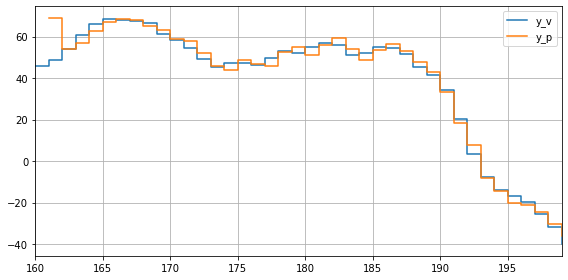

In [85]:
model = models.loc[(models.model == 'arx') & (models.na == 2) & (models.nb == 2) & (models.nk == 1)]
assert(len(model) == 1)
model = model.iloc[0]

print('G =')
display(model.G)
print('H =')
display(model.H)
print('J_p =', model.Jp)

plt.figure(figsize=(8,4))
plt.plot(k_v, y_v, label='y_v', drawstyle='steps-post')
plt.plot(k_v[model.nk:], model.yp, label='y_p', drawstyle='steps-post')
plt.xlim(k_v[0], k_v[-1])
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()